# MACHINE LEARNING
## Classifying whether a recipe is of cupcake or muffin using
#### SVM - Support Vector Machine Algorithm

In [3]:
# importing packages
import numpy as np
import pandas as pd

from sklearn import svm

# visualize your data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)    # here we also set the font scale

# beacuse we're running it in browser setup, we need this special library 
# in here to display the graphics in line
%matplotlib inline

In [5]:
# reading in our data
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')

In [7]:
# printing our data, the 1st 5
print(recipes.head())   

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


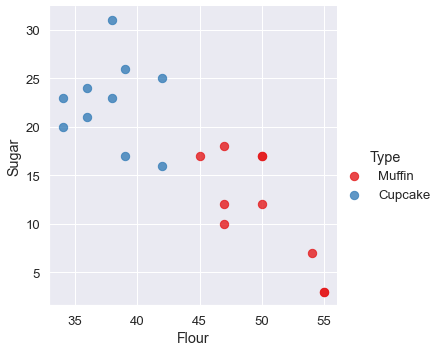

In [10]:
# Plotting our data - Sugar, and flour
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={'s': 70});


In [12]:
# format or pre-process our data
type_label = np.where(recipes['Type']=='Muffin', 0, 1)   # if = Type, 0 .. else if it's not, 1
recipe_features = recipes.columns.values[1:].tolist()   # from row 1, and convert it to a list
recipe_features   # just to see if it prints everything correctly
ingredients = recipes[['Flour', 'Sugar']].values   # gives us just the values
print(ingredients)     # to see the ingredients

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [13]:
# fit our model
# we use a package called svc
model = svm.SVC(kernel='linear')    # can check reference on website for their svm
model.fit(ingredients, type_label)   # we fit the ingredients, and the type label(muffin or ingredient)


SVC(kernel='linear')

In [16]:
# Newly trained model. Get the separating hyperplane
w = model.coef_[0]   # w is our variable, represents 2 different coefficients
a = -w[0] / w[1]     # generating the slope
xx = np.linspace(30, 60)    # creating a line of values between 30 and 60, set of numbers for x
yy = a * xx - (model.intercept_[0] / w[1])
# print(yy)   # uncomment this line to see the array, what's going on

# Plot the paralells to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])    # set of data
b = model.support_vectors_[-1]    
yy_up = a * xx + (b[1] - a * b[0])

C:\Users\caron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


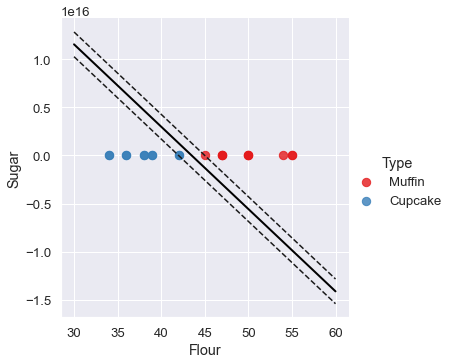

In [20]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={'s': 70})
plt.plot(xx, yy, linewidth=2, color='black')   # plotting our svm line in the middle to separate the data
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [26]:
# create a function to predict muffin or cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]])) == 0:    # we take our model and run a predict... common in sklearn, we use a .predict
        print('You\'re lokking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')
              
# predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're lokking at a muffin recipe!


C:\Users\caron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


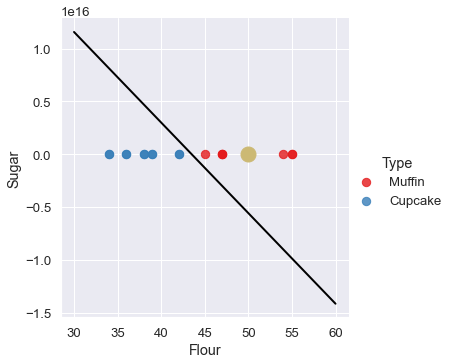

In [27]:
# let's plot it on the graph
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={'s': 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50,20, 'yo', markersize='15')   # yo is yellow, you can play around with the colors

# The end
### We've built a classifier using svm, which is able to classify if a recipe is of cupcake or muffin